# 2016 Presidential Campaign Finance Analysis 
## Shayne Li Chisheng

### Introduction
This project analyzes the 2016 Presidential Campaign Contributions data to compare Hillary Clinton's and Donald Trump's campaign finance between April 1st 2015 and November 28th 2016. The dataset was obtained from the Federal Election Commission (FEC), updated on December 9 2016.

### Dataset preparation
The dataset is retrieved and renamed to `donations.txt` with the following commands:
```
unzip P00000001-ALL.zip
mv P00000001-ALL.csv donations.txt
```

### Data summary
The raw data set is 1.44 GB. The FEC inserts commas at the end of each line, fooling the CSV readers that there empty fields at the end of every line. Eg. the first row of the dataset:
```
C00458844,"P60006723","Rubio, Marco","BLUM, MAUREEN","WASHINGTON","20","DC","STRATEGIC COALITIONS & INITIATIVES LL","OUTREACH DIRECTOR",175,15-MAR-16,"","","","SA17A","1082559","SA17.1152124","P2016",
```

`pandas's` file parsers treat the first column as the data frame's row name by default if the data set has 1 too many columns, hence, insert `index_col=False` to drop the last column to display the data frame properly. The dataset has 7,344,719 rows and 18 columns.

In [3]:
import pandas as pd
import numpy as np
donations = pd.read_csv('donations.txt', 
                        dtype={'contbr_zip': 'str', 'file_num': 'str'}, 
                        index_col=False)

# How many rows and columns does the dataframe have?
donations.shape

(7344719, 18)

In [2]:
# The first 5 lines of the dataset
donations.head()

cmte_id    cand_id       cand_nm            contbr_nm contbr_city  \
0  C00458844  P60006723  Rubio, Marco        BLUM, MAUREEN  WASHINGTON   
1  C00458844  P60006723  Rubio, Marco  DODSON, MARK B. MR.     ATLANTA   
2  C00458844  P60006723  Rubio, Marco    CHILDERS, WILLIAM         DPO   
3  C00458844  P60006723  Rubio, Marco     DOHERTY, THERESA         APO   
4  C00458844  P60006723  Rubio, Marco     RUCINSKI, ROBERT         APO   

  contbr_st contbr_zip                        contbr_employer  \
0        20         DC  STRATEGIC COALITIONS & INITIATIVES LL   
1        30         GA              MORTGAGE CAPITAL ADVISORS   
2        AE  098309998                               DIPLOMAT   
3        AE  097520002                               DODEA/DS   
4        AE  090960009                                US ARMY   

          contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc  \
0         OUTREACH DIRECTOR              175.0        15-MAR-16          NaN   
1  PRIVATE MORTGAGE BANKING               25.0        16-MAR-16          NaN   
2             US GOVERNMENT              100.0        20-FEB-16          NaN   
3                   TEACHER              500.0        26-JUN-15          NaN   
4                 PHYSICIAN              200.0        10-MAR-16          NaN   

  memo_cd        memo_text form_tp file_num       tran_id election_tp  
0     NaN              NaN   SA17A  1082559  SA17.1152124       P2016  
1     NaN  DEBT RETIREMENT   SA17A  1082559  SA17.1153048       P2016  
2     NaN              NaN   SA17A  1056862  SA17.1020839       P2016  
3     NaN              NaN   SA17A  1029436   SA17.769700       P2016  
4     NaN              NaN   SA17A  1082559  SA17.1078677       P2016

There are 7,344,719 observations in the campaign contributions data. Although there are extreme outliers in this dataset, with the highest donation amount at \$12,777,705.58 and the lowest donation amount at -\$93308.00, the interquartile range is moderate. The 25th percentile donation amount is \$15.00, the 75th percentile donation amount is \$90.00, and the median donation amount is \$28.00. The average donation to all presidential candidates is \$126.70, suggesting a right skewed distribution.

In [3]:
# Summary statistics
donations.describe()

contb_receipt_amt
count       7.344719e+06
mean        1.266980e+02
std         7.672454e+03
min        -9.330800e+04
25%         1.500000e+01
50%         2.800000e+01
75%         9.000000e+01
max         1.277771e+07

### Basic campaign finance statistics
This section analyses all positive donations to Hilliary Clinton and Donald Trump, excluding the refunds and the reattributions.

In [4]:
# Subset the positive campaign donations to Hillary Clinton
clinton = donations[(donations['cand_nm'] == 'Clinton, Hillary Rodham') & 
                    (donations['contb_receipt_amt'] > 0)]

In [5]:
# Subset the positive campaign donations to Donald Trump
trump = donations[(donations['cand_nm'] == 'Trump, Donald J.') & 
                  (donations['contb_receipt_amt'] > 0)]

Calculate the total positive donations to Clinton and Trump:

In [6]:
totalHRC = 0
totalDJT = 0

for row in clinton['contb_receipt_amt']:
    amountHRC = float(row)
    totalHRC += amountHRC

for row in trump['contb_receipt_amt']:
    amountDJT = float(row)
    totalDJT += amountDJT

Hillary Clinton received 3,471,104 non-refund/non-zero donations for the 2016 president election, totaling \$521,948,949.55. The lowest individual donation was \$0.01, and the highest individual amount was \$12,777,705.58. Her average donation amount was \$150.37, and the median amount was \$25.00. The top 10 donations were contributed by [Hillary Victory Fund](https://en.wikipedia.org/wiki/Hillary_Victory_Fund), a joint fundraising committee for Hilary Clinton's presidential campaign organization, the Democratic National Committee and 33 state Democratic committees.

In [7]:
# Clinton's campaign finance stats
print "Total positive donations: $%s" % totalHRC
clinton.describe()

Total positive donations: $521948949.55


contb_receipt_amt
count       3.471104e+06
mean        1.503697e+02
std         1.115170e+04
min         1.000000e-02
25%         1.500000e+01
50%         2.500000e+01
75%         1.000000e+02
max         1.277771e+07

In [8]:
top_HRCdonors = clinton.sort_values(by='contb_receipt_amt', ascending=False)
top_HRCdonors.head(10)

cmte_id    cand_id                  cand_nm  \
3253027  C00575795  P00003392  Clinton, Hillary Rodham   
3218162  C00575795  P00003392  Clinton, Hillary Rodham   
3272466  C00575795  P00003392  Clinton, Hillary Rodham   
3207908  C00575795  P00003392  Clinton, Hillary Rodham   
3382936  C00575795  P00003392  Clinton, Hillary Rodham   
3452399  C00575795  P00003392  Clinton, Hillary Rodham   
3511736  C00575795  P00003392  Clinton, Hillary Rodham   
3368569  C00575795  P00003392  Clinton, Hillary Rodham   
3373188  C00575795  P00003392  Clinton, Hillary Rodham   
3503211  C00575795  P00003392  Clinton, Hillary Rodham   

                                 contbr_nm contbr_city contbr_st contbr_zip  \
3253027  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3218162  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3272466  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3207908  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3382936  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3452399  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3511736  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3368569  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3373188  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   
3503211  HILLARY VICTORY FUND - UNITEMIZED    NEW YORK        NY  101855256   

        contbr_employer contbr_occupation  contb_receipt_amt contb_receipt_dt  \
3253027             NaN               NaN        12777705.58        31-JUL-16   
3218162             NaN               NaN         7402361.45        30-JUN-16   
3272466             NaN               NaN         6358481.89        24-AUG-16   
3207908             NaN               NaN         4904860.51        31-MAR-16   
3382936             NaN               NaN         4575438.56        31-MAY-16   
3452399             NaN               NaN         4560967.14        29-SEP-16   
3511736             NaN               NaN         4126693.23        13-OCT-16   
3368569             NaN               NaN         3686373.26        29-FEB-16   
3373188             NaN               NaN         3600489.08        29-APR-16   
3503211             NaN               NaN         2976430.32        19-OCT-16   

        receipt_desc memo_cd memo_text form_tp file_num     tran_id  \
3253027          NaN       X         *    SA18  1109498   CZ7181697   
3218162          NaN       X         *    SA18  1099613   CZ6015141   
3272466          NaN       X         *    SA18  1126762   CZ9917266   
3207908          NaN       X         *    SA18  1081062   CZ3511723   
3382936          NaN       X         *    SA18  1091720   CZ5175732   
3452399          NaN       X         *    SA18  1112134  CZ11580431   
3511736          NaN       X         *    SA18  1119042  CZ12852849   
3368569          NaN       X         *    SA18  1093618   CZ2794667   
3373188          NaN       X         *    SA18  1091718   CZ4370531   
3503211          NaN       X         *    SA18  1119042  CZ11051193   

        election_tp  
3253027         NaN  
3218162         NaN  
3272466         NaN  
3207908       P2016  
3382936       P2016  
3452399         NaN  
3511736         NaN  
3368569       P2016  
3373188       P2016  
3503211         NaN

Among the campaign contributors that donated to Hillary Clinton, 41 individuals from 28 different occupations donated at least \$5,000, ranging from homemakers to retired personnels.

In [9]:
clinton_topd = clinton[(clinton['contb_receipt_amt'] > 5000)]
hrcOcc = clinton_topd.groupby('contbr_occupation')

In [10]:
hrcOcc_sum = hrcOcc['contb_receipt_amt'].agg([np.sum, np.mean, len])
hrcOcc_sum.columns = ["Clinton's total donations ($)", "Clinton's average donation ($)", 
                    "Number of donors"]
hrcOcc_sum

Clinton's total donations ($)  \
contbr_occupation                                           
ACTRESS                                            5400.0   
ATTORNEY                                          32400.0   
BOOKKEEPER                                         5200.0   
CHAIRMAN, CEO                                      5400.0   
COMMISSIONER                                       5400.0   
CONSULTANT                                        10800.0   
COO                                                5400.0   
CORPORATE COMPLIANCE                               5400.0   
DEVELOPER                                          5400.0   
DOCTOR OF CHIRPORACTIC                             5400.0   
EXECUTIVE CHAIRMAN                                 5400.0   
HOMEMAKER                                         16200.0   
INFORMATION REQUESTED                             12700.0   
INVESTMENT MANAGER                                 5400.0   
INVESTOR                                           5400.0   
LAWYER                                             5400.0   
PHILANTHROPIC CONSULTING                           5400.0   
PHYSICIAN                                         20000.0   
PRESIDENT                                         10800.0   
PUBLIC RELATIONS                                   5400.0   
REAL ESTATE INVESTOR                              10000.0   
RETIRED                                           16200.0   
RETIRED PHYSICIAN                                  5400.0   
SOCIAL WORKER                                      5400.0   
SYSTEM ARCHITECT, DIRECTOR                         5400.0   
TALENT AGENT                                       5400.0   
TEACHER                                            5400.0   
WARNER BROTHERS TV                                 5400.0   
WRITER                                             5400.0   

                            Clinton's average donation ($)  Number of donors  
contbr_occupation                                                             
ACTRESS                                             5400.0               1.0  
ATTORNEY                                            5400.0               6.0  
BOOKKEEPER                                          5200.0               1.0  
CHAIRMAN, CEO                                       5400.0               1.0  
COMMISSIONER                                        5400.0               1.0  
CONSULTANT                                          5400.0               2.0  
COO                                                 5400.0               1.0  
CORPORATE COMPLIANCE                                5400.0               1.0  
DEVELOPER                                           5400.0               1.0  
DOCTOR OF CHIRPORACTIC                              5400.0               1.0  
EXECUTIVE CHAIRMAN                                  5400.0               1.0  
HOMEMAKER                                           5400.0               3.0  
INFORMATION REQUESTED                               6350.0               2.0  
INVESTMENT MANAGER                                  5400.0               1.0  
INVESTOR                                            5400.0               1.0  
LAWYER                                              5400.0               1.0  
PHILANTHROPIC CONSULTING                            5400.0               1.0  
PHYSICIAN                                          20000.0               1.0  
PRESIDENT                                           5400.0               2.0  
PUBLIC RELATIONS                                    5400.0               1.0  
REAL ESTATE INVESTOR                               10000.0               1.0  
RETIRED                                             5400.0               3.0  
RETIRED PHYSICIAN                                   5400.0               1.0  
SOCIAL WORKER                                       5400.0               1.0  
SYSTEM ARCHITECT, DIRECTOR                          5400.0               1.0  
TAL

On the other hand, Donald Trump received only 691,276 non-refund/non-zero donations for the 2016 president election, totaling \$118,448,599.51 (**4.4** times lower than Hillary Clinton). The lowest individual donation was \$0.80, and the highest individual amount was \$86,936.80. His average donation amount was \$171.35, and the median amount was \$50.00. Unlike Hillay Clinton, the top 10 donations to Donald Trump were mainly contributed by individual donors except for the Conservative Action Fund.

In [11]:
# Trump's campaign finance stats
print "Total positive donations: $%s" % totalDJT
trump.describe()

Total positive donations: $118448599.51


contb_receipt_amt
count      691276.000000
mean          171.347768
std           379.907465
min             0.800000
25%            28.000000
50%            50.000000
75%           200.000000
max         86936.800000

In [12]:
top_DJTdonors = trump.sort_values(by='contb_receipt_amt', ascending=False)
top_DJTdonors.head(10)

cmte_id    cand_id           cand_nm                 contbr_nm  \
6898891  C00580100  P80001571  Trump, Donald J.               BOCH, ERNIE   
6797518  C00580100  P80001571  Trump, Donald J.      FERRERO, LOUIS P MR.   
7242455  C00580100  P80001571  Trump, Donald J.  CONSERVATIVE ACTION FUND   
6878765  C00580100  P80001571  Trump, Donald J.          GORMAN, L.D. MR.   
7262592  C00580100  P80001571  Trump, Donald J.            GIGANTE, PETER   
7051053  C00580100  P80001571  Trump, Donald J.       ROVT, ALEXANDER MR.   
6849701  C00580100  P80001571  Trump, Donald J.            DOBSKI, ROBERT   
6598789  C00580100  P80001571  Trump, Donald J.              COBB, ROBERT   
7050417  C00580100  P80001571  Trump, Donald J.     TANZER, LEONARD J MR.   
7172715  C00580100  P80001571  Trump, Donald J.        WEST, THEODORE MR.   

         contbr_city contbr_st contbr_zip          contbr_employer  \
6898891      NORWOOD        MA      02062    BOCH AUTOMOTIVE GROUP   
6797518       CANTON        GA      30115    INFORMATION REQUESTED   
7242455   ALEXANDRIA        VA      22314                      NaN   
6878765       HAZARD        KY      41702    INFORMATION REQUESTED   
7262592   BELLINGHAM        WA      98225            SELF-EMPLOYED   
7051053     BROOKLYN        NY      11234    INFORMATION REQUESTED   
6849701  BLOOMINGTON        IL      61704    INFORMATION REQUESTED   
6598789   BIRMINGHAM        AL      35209            COBB THEATERS   
7050417    SCARSDALE        NY      10583  PATIENT CARE ASSOCIATES   
7172715   WHITESBORO        TX      76273    INFORMATION REQUESTED   

             contbr_occupation  contb_receipt_amt contb_receipt_dt  \
6898891              EXECUTIVE           86936.80        28-AUG-15   
6797518  INFORMATION REQUESTED           12500.00        21-JUL-16   
7242455                    NaN           10030.24        04-DEC-15   
6878765  INFORMATION REQUESTED           10000.00        21-JUL-16   
7262592    INTERNATIONAL TRADE           10000.00        04-AUG-16   
7051053  INFORMATION REQUESTED           10000.00        08-NOV-16   
6849701  INFORMATION REQUESTED           10000.00        03-NOV-16   
6598789                  OWNER           10000.00        02-NOV-16   
7050417              PRESIDENT            7300.00        07-NOV-16   
7172715  INFORMATION REQUESTED            5400.00        25-AUG-16   

        receipt_desc memo_cd memo_text form_tp file_num        tran_id  \
6898891          NaN     NaN       NaN   SA17A  1036338     SA17A.7395   
6797518          NaN     NaN       NaN   SA17A  1104813  SA17A.1625219   
7242455          NaN       X       NaN   SA17A  1047287   SA17A.250744   
6878765          NaN     NaN       NaN   SA17A  1104813  SA17A.1625209   
7262592          NaN     NaN       NaN   SA17A  1126295  SA17A.2178108   
7051053          NaN     NaN       NaN   SA17A  1133930  SA17A.2823364   
6849701          NaN     NaN       NaN   SA17A  1133930  SA17A.2681307   
6598789          NaN     NaN       NaN   SA17A  1133930  SA17A.2681043   
7050417          NaN     NaN       NaN   SA17A  1133930  SA17A.2823366   
7172715          NaN     NaN       NaN   SA17A  1126295  SA17A.2183166   

        election_tp  
6898891       P2016  
6797518       P2016  
7242455       P2016  
6878765       P2016  
7262592       G2016  
7051053       G2016  
6849701       G2016  
6598789       G2016  
7050417       G2016  
7172715       G2016

Among the campaign contributors that donated to Donald Trump, 44 individuals from only 14 different occupations donated at least \$5,000. Majority of these contributors did not disclose their occupations, other donors are primarily business presidents and investors.

In [13]:
trump_topd = trump[(trump['contb_receipt_amt'] > 5000)]
djtOcc = trump_topd.groupby('contbr_occupation')

In [14]:
djtOcc_sum = djtOcc['contb_receipt_amt'].agg([np.sum, np.mean, len])
djtOcc_sum.columns = ["Trump's total donations ($)", "Trump's average donation ($)", 
                    "Number of donors"]
djtOcc_sum

Trump's total donations ($)  \
contbr_occupation                                     
ARTIST                                       5400.0   
BROKER                                       5400.0   
CHAIRMAN                                     5400.0   
EVP                                          5400.0   
EXECUTIVE                                   92336.8   
HOMEMAKER                                    5400.0   
INFORMATION REQUESTED                      155900.0   
INTERNATIONAL TRADE                         10000.0   
INVESTMENT                                   5400.0   
INVESTMENTS                                  5400.0   
MANAGING PARTNER                             5400.0   
OIL & GAS BUSINESS                           5400.0   
OWNER                                       10000.0   
PRACTICE ADMINISTRATOR                       5400.0   
PRESIDENT                                   18100.0   
PRESIDENT/CEO                                5400.0   
RETIRED                                      5400.0   

                        Trump's average donation ($)  Number of donors  
contbr_occupation                                                       
ARTIST                                   5400.000000               1.0  
BROKER                                   5400.000000               1.0  
CHAIRMAN                                 5400.000000               1.0  
EVP                                      5400.000000               1.0  
EXECUTIVE                               46168.400000               2.0  
HOMEMAKER                                5400.000000               1.0  
INFORMATION REQUESTED                    6236.000000              25.0  
INTERNATIONAL TRADE                     10000.000000               1.0  
INVESTMENT                               5400.000000               1.0  
INVESTMENTS                              5400.000000               1.0  
MANAGING PARTNER                         5400.000000               1.0  
OIL & GAS BUSINESS                       5400.000000               1.0  
OWNER                                   10000.000000               1.0  
PRACTICE ADMINISTRATOR                   5400.000000               1.0  
PRESIDENT                                6033.333333               3.0  
PRESIDENT/CEO                            5400.000000               1.0  
RETIRED                                  5400.000000               1.0

### Comparing Clinton's and Trump's campaign donations by states
Across all 50 states and Washington D.C., Hillary Clinton had more donations than Donald Trump in every state except for Mississippi. Clinton also outraised Trump in total donation amount in every state except for Mississippi and North Dakota. The 3 states where Hillary Clinton received the highest amount of total donations were New York (\$146.33 million), California (\$95.19 million) and Texas (\$22.98 million). The 3 states where Donald Trump received the highest amount of donations were Texas (\$15.07 million), California (\$13.28 million) and Florida (\$12.14 million).

In [15]:
# Aggregate Clinton's non-refund/non-zero donations by States
hrcState = clinton[clinton['contbr_st'].isin(['AK', 'AL', 'AR', 'AZ', 'CA', 
                                              'CO', 'CT', 'DC', 'DE', 'FL', 
                                              'GA', 'HI', 'IA', 'ID', 'IL', 
                                              'IN', 'KS', 'KY', 'LA', 'MA', 
                                              'MD', 'ME', 'MI', 'MN', 'MO', 
                                              'MS', 'MT', 'NC', 'ND', 'NE', 
                                              'NH', 'NJ', 'NM', 'NV', 'NY', 
                                              'OH', 'OK', 'OR', 'PA', 'RI', 
                                              'SC', 'SD', 'TN', 'TX', 'UT', 
                                              'VA', 'VT', 'WA', 'WI', 'WV', 
                                              'WY'])]

# Group by State
hrcst = hrcState.groupby('contbr_st')

In [16]:
# Aggregate donation amounts
hrcst_sum = hrcst['contb_receipt_amt'].agg([np.sum, np.mean, len])
hrcst_sum.columns = ["Clinton's total donations ($)", "Clinton's average donation ($)", 
                    "Clinton's number of donations by State"]

In [17]:
# Aggregate Trump's non-refund/non-zero donations by States
djtState = trump[trump['contbr_st'].isin(['AK', 'AL', 'AR', 'AZ', 'CA', 
                                          'CO', 'CT', 'DC', 'DE', 'FL', 
                                          'GA', 'HI', 'IA', 'ID', 'IL', 
                                          'IN', 'KS', 'KY', 'LA', 'MA', 
                                          'MD', 'ME', 'MI', 'MN', 'MO', 
                                          'MS', 'MT', 'NC', 'ND', 'NE', 
                                          'NH', 'NJ', 'NM', 'NV', 'NY', 
                                          'OH', 'OK', 'OR', 'PA', 'RI', 
                                          'SC', 'SD', 'TN', 'TX', 'UT', 
                                          'VA', 'VT', 'WA', 'WI', 'WV', 
                                          'WY'])]

# Group by State
djtst = djtState.groupby('contbr_st')

In [18]:
# Aggregate donation amounts
djtst_sum = djtst['contb_receipt_amt'].agg([np.sum, np.mean, len])
djtst_sum.columns = ["Trump's total donations ($)", "Trump's average donation ($)", 
                    "Trump's number of donations by state"]

In [19]:
cam_st = pd.concat([hrcst_sum, djtst_sum], axis=1)
cam_st

Clinton's total donations ($)  Clinton's average donation ($)  \
contbr_st                                                                  
AK                          5.473696e+05                       78.894444   
AL                          1.917914e+06                       97.777943   
AR                          2.466774e+06                      130.842537   
AZ                          4.383767e+06                       76.370913   
CA                          9.518681e+07                      139.669015   
CO                          8.630722e+06                      122.693083   
CT                          8.330325e+06                      146.112720   
DC                          1.789246e+07                      252.009998   
DE                          8.184898e+05                       79.689401   
FL                          2.233567e+07                      122.647305   
GA                          7.160014e+06                      105.983220   
HI                          1.134283e+06                       85.567547   
IA                          1.751538e+06                       75.774944   
ID                          5.976805e+05                       71.245735   
IL                          1.638207e+07                      134.847430   
IN                          2.562243e+06                       79.506083   
KS                          1.344051e+06                       85.028840   
KY                          1.695752e+06                       80.139506   
LA                          1.988203e+06                      118.225775   
MA                          2.162146e+07                      141.715964   
MD                          1.641223e+07                      149.772561   
ME                          1.697651e+06                      101.189203   
MI                          6.600680e+06                       96.717515   
MN                          5.212895e+06                       94.386914   
MO                          4.390591e+06                      116.021207   
MS                          6.224339e+05                      101.971474   
MT                          5.576913e+05                       76.901724   
NC                          6.746156e+06                       97.055826   
ND                          2.353832e+05                       81.334917   
NE                          9.121759e+05                       88.552166   
NH                          1.613273e+06                       95.279538   
NJ                          1.254272e+07                      110.113699   
NM                          2.611356e+06                       99.853016   
NV                          2.381791e+06                       89.868733   
NY                          1.463313e+08                      370.764974   
OH                          6.793320e+06                       96.158654   
OK                          2.085660e+06                      117.482095   
OR                          4.856192e+06                       73.370788   
PA                          1.299310e+07                      109.873571   
RI                          1.714303e+06                      136.695896   
SC                          2.323836e+06                       96.360775   
SD                          4.043436e+05                      141.974582   
TN                          3.802266e+06                      101.469522   
TX                          2.298245e+07                      113.884999   
UT                          1.281651e+06                       86.469486   
VA                          1.623574e+07                      147.615043   
VT                          8.301353e+05                       99.274732   
WA                          1.292851e+07                      103.349544   
WI                          2.809717e+06                       85.024406   
WV                          6.415669e+05                       78.450337   
WY                          4.583477e+05                   

Plot Clinton's campaign donations to Plotly:

In [34]:
import plotly.plotly as py
py.sign_in('shngl', 'sdmS8mcf6VRiqPtTapMc')

ob = pd.read_csv('clinton donations.csv')

for col in ob.columns:
    ob[col] = ob[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = ob['State'],
        z = ob["Clinton's total donations ($)"].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = '2016 Clinton Campaign Donations by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict(data=data, layout=layout)

url = py.plot(fig, validate=False, filename='d3-clinton-map')

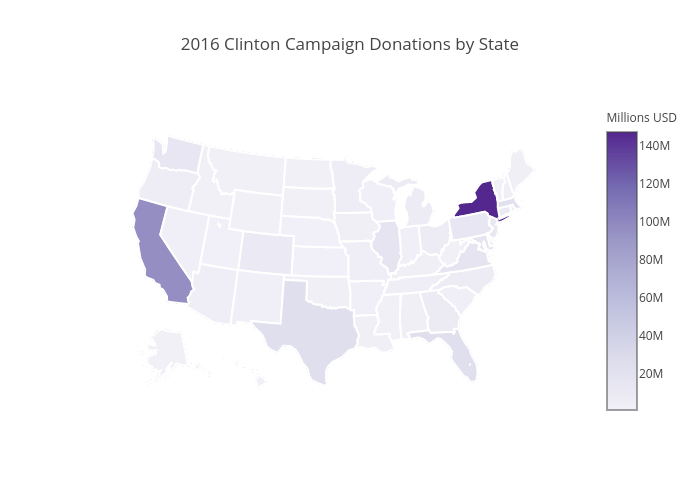

In [35]:
from IPython.display import Image
Image(filename='clinton.png')

Plot Trump's campaign donations to Plotly:

In [36]:
rm = pd.read_csv('trump donations.csv')

for col in rm.columns:
    rm[col] = rm[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = rm['State'],
        z = rm["Trump's total donations ($)"].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Millions USD"
        )
    ) ]

layout = dict(
        title = '2016 Trump Campaign Donations by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict(data=data, layout=layout)
url = py.plot(fig, validate=False, filename='d3-trump-map')

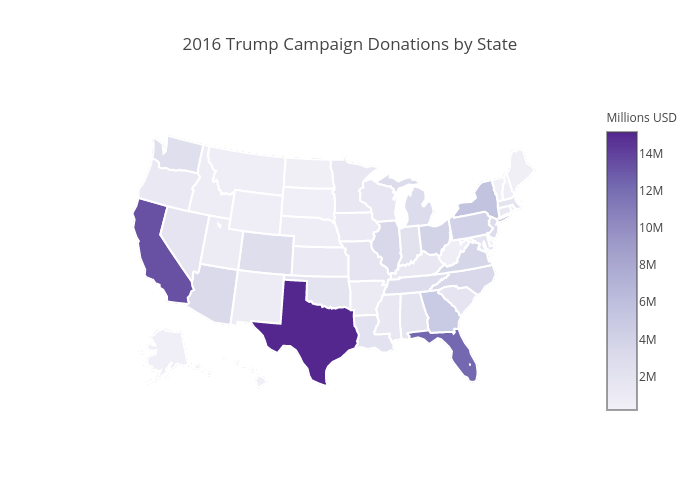

In [37]:
Image(filename='trump.png')

### Comparing Clinton's and Trump's monthly campaign donations between April 2015 and November 2016

Hilary Clinton received donations beginning in April 2015 as soon as she prepared to enter the Decromat presidential primary race. Her donation amounts began to spike between February 2016 and June 2016 as the primary race between Clinton and Bernie Sanders became intense. Her donations increased significantly after she clinched the Democratic nomination, especially towards the end of the presidential election in October 2016 and Nobember 2016. 

On the other hand, Donald Trump received negligible amount of donations before June 2016, when he mainly self-funded his Republican primary campaign. Once Trump was formally nominated as the Republican candidate, he began to receive more campaign donations, albeit at lower funding levels than Hillary Clinton. Despite Trump received lower campaign donations, he was won the presidential election on November 8 2016 with 306 electoral college votes.

In [20]:
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
import csv, sys, datetime

reader = csv.DictReader(open("donations.txt", 'r'))

hrcDonations = defaultdict(lambda:0)
djtDonations = defaultdict(lambda:0)

In [21]:
for row in reader:
    name = row['cand_nm']
    datestr = row['contb_receipt_dt']
    amount = float(row['contb_receipt_amt'])
    date = datetime.datetime.strptime(datestr, '%d-%b-%y')

    if 'Clinton' in name:
        hrcDonations[date] += amount
    if 'Trump' in name:
        djtDonations[date] += amount

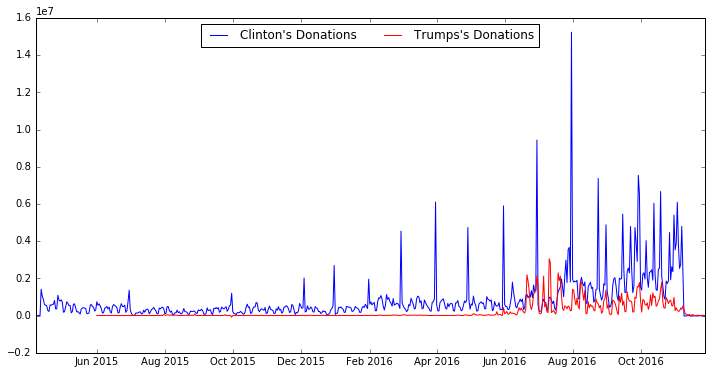

In [22]:
fig = plt.figure(figsize=(12,6))    # create a 12-inch x 6-inch figure
sorted_by_dateHRC = sorted(hrcDonations.items(), key=lambda (key,val): key)
sorted_by_dateDJT = sorted(djtDonations.items(), key=lambda (key,val): key)

# Note: 1 DJT entry for $400 was recorded on 8/30/2006, the entry was 
# removed to not skew the x-axis
sorted_by_dateDJT2 = sorted_by_dateDJT[1:]

xs1,ys1 = zip(*sorted_by_dateHRC)
xs2,ys2 = zip(*sorted_by_dateDJT2)
plt.plot(xs1, ys1, label="Clinton's Donations")
plt.plot(xs2, ys2, color = 'r', label="Trumps's Donations")
plt.legend(loc='upper center', ncol = 4)

### Comparing distribution of Clinton's and Trump's campaign donations
Because of the large number of outliers, I display the campaign donation distribution for both candidates within \$0 and \$1,100. Hillary Clinton is on the left and Donald Trump is on the right of the violin plot, and it indicates that Clinton's donations were concentrated in the smaller amounts between \$15 and \$25 while Trump's donations were more concentrated in amounts exceeding \$50.

In [23]:
import seaborn as sns
sns.set_style("whitegrid")

ctVio = donations[(donations['cand_nm'].isin(['Clinton, Hillary Rodham', 'Trump, Donald J.'])) &
                 (donations['contb_receipt_amt'] < 1100)]

ctVio2 = ctVio[ctVio['contb_receipt_amt'] > 0]

[<matplotlib.text.Text at 0x119499d50>, <matplotlib.text.Text at 0x11948d410>]

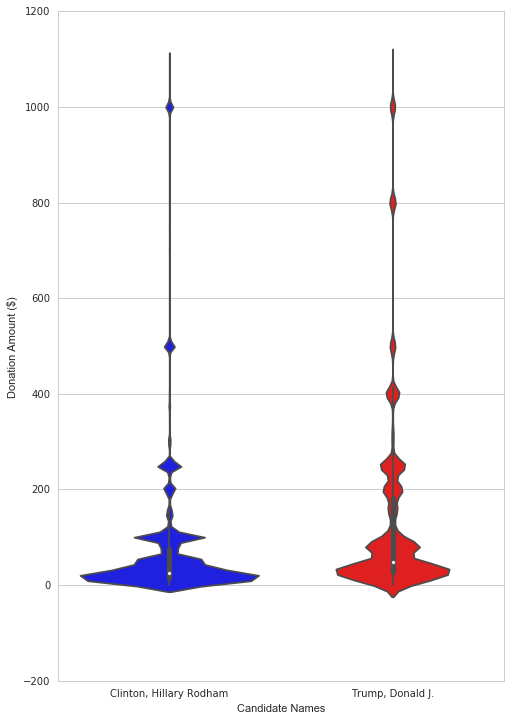

In [24]:
fig = plt.figure(figsize=(8,12))
ax = sns.violinplot(x="cand_nm", y="contb_receipt_amt", data=ctVio2,
                    palette=['b','r'])
ax.set(xlabel='Candidate Names', ylabel='Donation Amount ($)')

### Performing ttests on Clinton's and Trump's campaign donations data
I perform a statistical test on the data to determine if the difference between Clinton's and Trump's average campaign contribution is significant. I conduct the Shapiro-Wilk test to check if the data is actually normal for both presidential candidates. In this case, the test calculates a p-value and tells us that it is not normally distributed if the p-value <0.05. 

Hillary Clinton has a Shapiro-Wilks p-value of 0.000847, which indicates her donations are not normally distributed.

In [25]:
import csv,sys,datetime,collections
import numpy
import scipy.stats
import welchttest

reader = csv.DictReader(open("donations.txt", 'r'))
idx = 0

candtomoney = collections.defaultdict(list)

In [26]:
for row in reader:
    name = row['cand_nm']
    amount = float(row['contb_receipt_amt'])
    candtomoney[name].append(amount)

clinton = candtomoney["Clinton, Hillary Rodham"]
trump = candtomoney["Trump, Donald J."]

In [27]:
print "Clinton's Shapiro-Wilks p-value", scipy.stats.shapiro(clinton)
print "Trump's Shapiro-Wilks p-value", scipy.stats.shapiro(trump)

Clinton's Shapiro-Wilks p-value (0.0008471012115478516, 0.0)
Trump's Shapiro-Wilks p-value (0.37018465995788574, 0.0)


//anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1329: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because T-Tests are resilient to breaking of the normality assumption and there are nonparametric equivalents that don't make normality assumptions, I run the Mann-Whitney U nonparametric T-test to determine on the campaign dataset. The reported p-value is about 0, so the difference between Clinton's and Trump's average donation amount is statistically significant.

In [28]:
print "mann-whitney U", scipy.stats.mannwhitneyu(clinton, trump)

mann-whitney U MannwhitneyuResult(statistic=876516049901.0, pvalue=0.0)


### Who also contributed to other candidates?

Finally, using campaign donors' names and cities, I examine which of Clinton's and Trump's donors also contributed to other candidates' campaigns, and by how much money.

In [4]:
# Subset data frame where contribution > $0
donations_pos = donations[(donations['contb_receipt_amt'] > 0)]

In [5]:
# Create a new column containing the tuples of donors' name and city
donations_pos['name_city'] = list(zip(donations_pos.contbr_nm, donations_pos.contbr_city))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Clinton
Clinton's donors have made 60,655 unique donations to Vermont Senator Bernie Sander for a total of \$4,717,836.44. That constitutes 61.4% of the overall contributions that Clinton donors have given to other candidates. Martin O'Malley is the next closest rival to receive donations from Clinton's donors for a total of \$559,166.79 (7.28%). Interestingly, some of Clinton's donors have also contributed to Republican candidates, mainly to Ohio Governor John Kasich (\$436,265.17), Donald Trump (\$423,363.73), Texas Senator Ted Cruz (\$291,553.77), former Florida Governor Jeb Bush (\$270,618.30) and Florida Senator Marco Rubio (\$209,683.27). Many of these donors are likely contributors who "defected" from the GOP when their preferred Republican candidate did not win the Republican Primary race.

In [6]:
# Subset clinton donations
clinton = donations_pos[(donations_pos['cand_nm'] == 'Clinton, Hillary Rodham')]

In [41]:
# Drop duplicated values by donor's name, city and state
clinton_dup = clinton.drop_duplicates(subset = ['contbr_nm','contbr_city','contbr_st'])

In [42]:
# Get unique donors' names and cities into tuples
clintDonors = list(zip(clinton_dup.contbr_nm, clinton_dup.contbr_city))

In [43]:
# Subset all donations that match tuples into a new data frame
clinton_contrib = donations_pos[donations_pos['name_city'].isin(clintDonors)]

In [44]:
# drop clinton from the cand_nm
clinton_contrib2 = clinton_contrib[(clinton_contrib['cand_nm'] != 'Clinton, Hillary Rodham')]

In [45]:
# groupby and aggregate
hrc_contrib = clinton_contrib2.groupby('cand_nm')

In [46]:
hrc_contrisum = hrc_contrib['contb_receipt_amt'].agg([np.sum, np.mean, len])

hrc_contrisum.columns = ["Total donations ($)", "Average donation ($)", 
                         "Number of donations"]

In [47]:
hrc_contrisum.sort_values(by='Total donations ($)', ascending=False)

Total donations ($)  Average donation ($)  \
cand_nm                                                                
Sanders, Bernard                    4717836.44             77.781493   
O'Malley, Martin Joseph              559166.79            786.451181   
Kasich, John R.                      436265.17            551.536245   
Trump, Donald J.                     423363.73            453.766056   
Cruz, Rafael Edward 'Ted'            291553.77            548.033402   
Bush, Jeb                            270618.30            650.524760   
Rubio, Marco                         209683.27            339.843225   
Graham, Lindsey O.                   132011.60           1257.253333   
Lessig, Lawrence                     114634.89            902.636929   
Christie, Christopher J.             112480.00           1323.294118   
Johnson, Gary                         59852.40            544.112727   
Webb, James Henry Jr.                 57375.09            699.696220   
Paul, Rand                            52790.17            942.681607   
Pataki, George E.                     42500.00           2236.842105   
Walker, Scott                         40638.00           1693.250000   
Carson, Benjamin S.                   38221.16            269.163099   
Jindal, Bobby                         28200.00           2169.230769   
Fiorina, Carly                        26063.00            361.986111   
McMullin, Evan                        23974.50            347.456522   
Huckabee, Mike                        20842.50            595.500000   
Stein, Jill                           18109.00            177.539216   
Perry, James R. (Rick)                 2700.00           2700.000000   
Santorum, Richard J.                   2000.00           1000.000000   

                           Number of donations  
cand_nm                                         
Sanders, Bernard                       60655.0  
O'Malley, Martin Joseph                  711.0  
Kasich, John R.                          791.0  
Trump, Donald J.                         933.0  
Cruz, Rafael Edward 'Ted'                532.0  
Bush, Jeb                                416.0  
Rubio, Marco                             617.0  
Graham, Lindsey O.                       105.0  
Lessig, Lawrence                         127.0  
Christie, Christopher J.                  85.0  
Johnson, Gary                            110.0  
Webb, James Henry Jr.                     82.0  
Paul, Rand                                56.0  
Pataki, George E.                         19.0  
Walker, Scott                             24.0  
Carson, Benjamin S.                      142.0  
Jindal, Bobby                             13.0  
Fiorina, Carly                            72.0  
McMullin, Evan                            69.0  
Huckabee, Mike                            35.0  
Stein, Jill                              102.0  
Perry, James R. (Rick)                     1.0  
Santorum, Richard J.                       2.0

In [5]:
# Plot the total donations for each candidate into a pie chart
import cufflinks as cf
cf.set_config_file(world_readable=True,offline=True)

In [6]:
cd = pd.read_csv('clintonDonors.csv')

# For online view of the pie chart
cd.iplot(kind='pie',labels='cand_nm',values='Total donations ($)',
         textposition='outside',textinfo='value+percent')

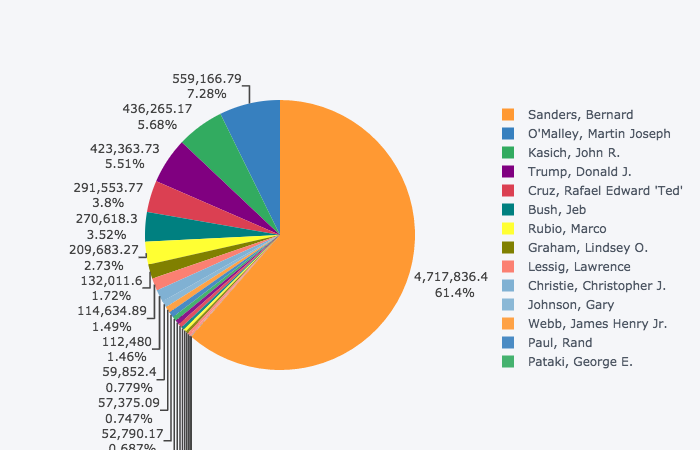

In [7]:
# For offline view of the pie chart
Image(filename='clintonDonors.png')

#### Trump
On the other hand, Trump's donors have made 32,865 unique donations to Ted Cruz for a total of \$4,518,348.64. That constitutes 35.8% of the overall contributions that Trump's donors have given to other candidates. Ben Carson is the next closest rival to receive donations from Trump's donors for a total of \$2,590,864.14 (20.5%), followed by Marco Rubio for \$1,515,031.74 (12%). Majority of Trump's donors that gave to other candidates have contributed to GOP candidates. These are likely to be donors who supported Trump's opponents during the Republican Primary Election, who later converged to support his campaign once he clinched the party nomination for the General Election. 

For campaign donors that gave to both Hillary Clinton and Donald Trump, Clinton received more donations for \$792,800.17 but in smallar individual amount (average amount of \$238.36 per donation), whereas Trump received less money for \$423,363.73 but in larger individual amount (average amount of \$453.77 per donation).

In [54]:
# Subset trump donations
trump = donations_pos[(donations_pos['cand_nm'] == 'Trump, Donald J.')]

In [55]:
# Drop duplicated values by donor's name, city and state
trump_dup = trump.drop_duplicates(subset = ['contbr_nm','contbr_city','contbr_st'])

In [56]:
# Get unique donors' names and cities into tuples
trumpDonors = list(zip(trump_dup.contbr_nm, trump_dup.contbr_city))

In [57]:
# Subset all donations that match tuples into a new data frame
trump_contrib = donations_pos[donations_pos['name_city'].isin(trumpDonors)]

In [58]:
# drop trump from the cand_nm
trump_contrib2 = trump_contrib[(trump_contrib['cand_nm'] != 'Trump, Donald J.')]

In [59]:
# groupby and aggregate
djt_contrib = trump_contrib2.groupby('cand_nm')

In [60]:
djt_contrisum = djt_contrib['contb_receipt_amt'].agg([np.sum, np.mean, len])

djt_contrisum.columns = ["Total donations ($)", "Average donation ($)", 
                         "Number of donations"]

In [61]:
djt_contrisum.sort_values(by='Total donations ($)', ascending=False)

Total donations ($)  Average donation ($)  \
cand_nm                                                                
Cruz, Rafael Edward 'Ted'           4518348.64            137.482082   
Carson, Benjamin S.                 2590864.14            126.587391   
Rubio, Marco                        1515031.74            181.832902   
Clinton, Hillary Rodham              792800.17            238.364453   
Fiorina, Carly                       670430.06            156.605947   
Walker, Scott                        590573.43            605.716338   
Kasich, John R.                      389367.25            331.658646   
Bush, Jeb                            364482.91            349.791660   
Paul, Rand                           334842.39            202.321686   
Huckabee, Mike                       207417.57            278.412846   
Sanders, Bernard                     192944.07             73.727195   
Christie, Christopher J.             164253.00            401.596577   
Jindal, Bobby                         62263.16            778.289500   
Graham, Lindsey O.                    62063.00            492.563492   
Perry, James R. (Rick)                40148.16            802.963200   
Santorum, Richard J.                  40075.00            817.857143   
Johnson, Gary                         37499.39            279.846194   
Stein, Jill                           12771.20            283.804444   
Pataki, George E.                      8150.00           1164.285714   
O'Malley, Martin Joseph                7480.55            393.713158   
Webb, James Henry Jr.                  6325.00            301.190476   
McMullin, Evan                         2912.50            171.323529   
Gilmore, James S III                   1000.00           1000.000000   
Lessig, Lawrence                        850.00            283.333333   

                           Number of donations  
cand_nm                                         
Cruz, Rafael Edward 'Ted'              32865.0  
Carson, Benjamin S.                    20467.0  
Rubio, Marco                            8332.0  
Clinton, Hillary Rodham                 3326.0  
Fiorina, Carly                          4281.0  
Walker, Scott                            975.0  
Kasich, John R.                         1174.0  
Bush, Jeb                               1042.0  
Paul, Rand                              1655.0  
Huckabee, Mike                           745.0  
Sanders, Bernard                        2617.0  
Christie, Christopher J.                 409.0  
Jindal, Bobby                             80.0  
Graham, Lindsey O.                       126.0  
Perry, James R. (Rick)                    50.0  
Santorum, Richard J.                      49.0  
Johnson, Gary                            134.0  
Stein, Jill                               45.0  
Pataki, George E.                          7.0  
O'Malley, Martin Joseph                   19.0  
Webb, James Henry Jr.                     21.0  
McMullin, Evan                            17.0  
Gilmore, James S III                       1.0  
Lessig, Lawrence                           3.0

In [8]:
td = pd.read_csv('trumpDonors.csv')

# For online view of the pie chart
td.iplot(kind='pie',labels='cand_nm',values='Total donations ($)',
         textposition='outside',textinfo='value+percent')

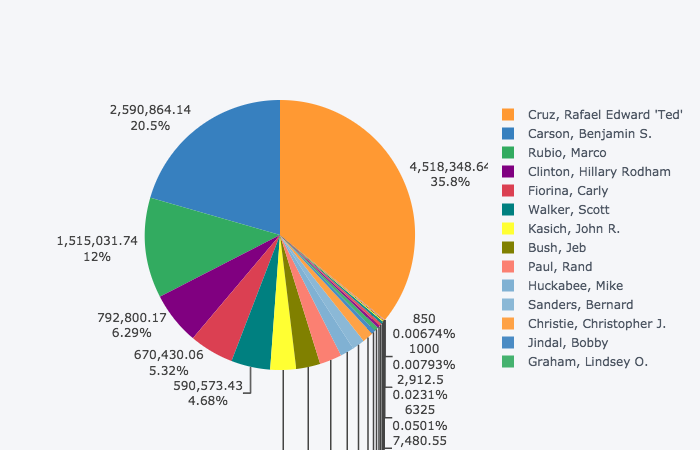

In [9]:
# For offline view of the pie chart
Image(filename='trumpDonors.png')

### Resource
The 2016 Presidential Campaign Contributions dataset is available [here](ftp://ftp.fec.gov/FEC/Presidential_Map/2016/P00000001/P00000001-ALL.zip).